In [115]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [131]:
# data source: https://www.ncdc.noaa.gov/cdo-web/datatools/lcd

df = pd.read_csv('/Users/matthewdwyer/Downloads/weather_nyc_2017.csv')
df = df[df['NAME'] == 'NY CITY CENTRAL PARK, NY US']
df['DATE'] = pd.to_datetime(df['DATE'])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,9,11,13,21,35,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


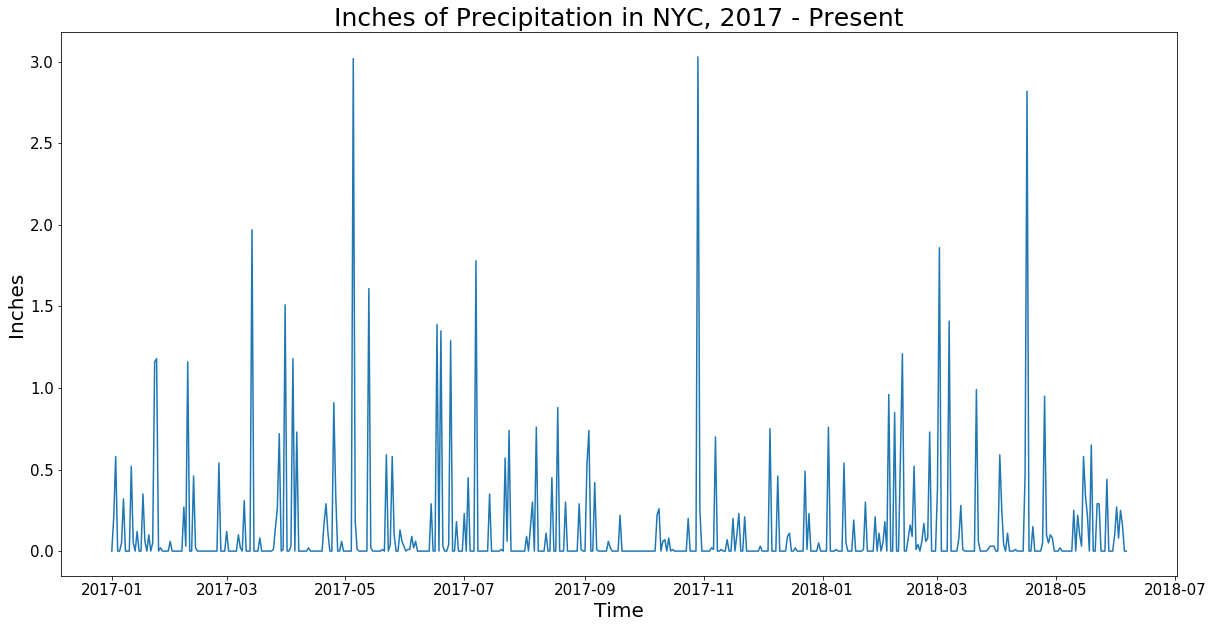

In [137]:
plt.figure(figsize=(20,10))
plt.title('Inches of Precipitation in NYC, 2017 - Present',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Inches',fontsize=20)
plt.plot(df['DATE'],df['PRCP'])
plt.show()

In [118]:
# reduce to rainless days of Fall/ Spring of 2017
df = df[df['DATE'].dt.year == 2017]
df = df[(df['DATE'].dt.month == 9) | (df['DATE'].dt.month == 10 )| (df['DATE'].dt.month == 11)|\
        (df['DATE'].dt.month == 4) | (df['DATE'].dt.month == 5) | (df['DATE'].dt.month == 6)]

df = df[df['PRCP'] == 0]

df = df.sort_values('DATE')


df['Date_diff'] = df['DATE'].shift(-1) - df['DATE']

# keep days that are one day away from at least one other day
seq_days = (df.Date_diff == timedelta(days=1)) | (df.Date_diff.shift(1) == timedelta(days=1))
df['keep_day'] = np.where(seq_days,1,0)
df = df[df['keep_day'] == 1]

In [119]:
df['Time_needed'] = ''
df = df[['DATE','Date_diff','Time_needed']]

In [120]:
df.head()

,DATE,Date_diff,Time_needed
37155,2017-04-01,1 days,
37156,2017-04-02,3 days,
37161,2017-04-07,1 days,
37162,2017-04-08,1 days,
37163,2017-04-09,1 days,


In [122]:
# the times of day needed will be rainless days surrounded by rainless days, so both PM and AM,
# rainless days with only a rainless day before, so only need AM, or rainless days with only a rainless day 
# after, so need PM

df['Time_needed'] = np.where(df['Date_diff'] == timedelta(days=1),'PM','AM')

df['Time_needed'] = np.where((df['Time_needed'] == 'PM') & (df['Time_needed'].shift(1) == 'PM'),'AM/PM',df['Time_needed'])

In [129]:
df

,DATE,Date_diff,Time_needed
37155,2017-04-01,1 days,PM
37156,2017-04-02,3 days,AM
37161,2017-04-07,1 days,PM
37162,2017-04-08,1 days,AM/PM
37163,2017-04-09,1 days,AM/PM
37164,2017-04-10,1 days,AM/PM
37165,2017-04-11,2 days,AM
37167,2017-04-13,1 days,PM
37168,2017-04-14,1 days,AM/PM
37169,2017-04-15,1 days,AM/PM
